# Tarea 1

**Envío del PR inicial:** viernes 21 de septiembre

**Aceptación del PR:** martes 25 de septiembre

## 1

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. 

- ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?
    
- ¿Qué propiedad hace que el interés en este mapeo sea el intervalo [-2,2]$


In [1]:
using Plots
#Pkg.add("Interact")
using Interact # Esto es para tener graficas interactivas
#Pkg.add("PyPlot")
using PyPlot # Para otro tipo de graficas

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/411932bbeb63c1e811d5d3c4add71783ae1eeaa7-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/411932bbeb63c1e811d5d3c4add71783ae1eeaa7-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
doc"""
    Fμ(f, x0, n_iter)
Devuelve el vector `iterados` que incluye como componentes a la condicion inicial `x_0` y a los iterados obtenidos a partir de `x_0` evaluado en la función `F` 
"""
function Fμ(f, x0, n_iter::Int64=1000)

    iterados= [x0]    
    x_nn = x_n = x0
    
    for i in 1:n_iter
        x_nn = f(x_n)
        x_n = x_nn
        push!(iterados, x_nn)
    end
    
    return iterados
end

Fμ

In [3]:
F(x) = x^2 - 2

F (generic function with 1 method)

### (a) Condición inicial $x_0 = 0 $

In [4]:
Fμ(F, 0, 10000)

10001-element Array{Int64,1}:
  0
 -2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  ⋮
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2

 Para la condición $x_0 = 0$ observamos que a partir de $F^2$, $F(x) = 2$, es decir, que desde $F^2(x)$ hasta $F^{100}(x)$, $F(x) = 2$. Dicho de otra manera, el unico itereado diferente de 2 es el primer iterado $F^1(x)$

### (b) Condición inicial $x_0 = 0.1$

In [5]:
Fμ(F, 0.1, 10000)

10001-element Array{Float64,1}:
  0.1      
 -1.99     
  1.9601   
  1.84199  
  1.39293  
 -0.0597333
 -1.99643  
  1.98574  
  1.94317  
  1.77589  
  1.15379  
 -0.668772 
 -1.55274  
  ⋮        
 -0.18187  
 -1.96692  
  1.86879  
  1.49237  
  0.227155 
 -1.9484   
  1.79626  
  1.22657  
 -0.495532 
 -1.75445  
  1.07809  
 -0.837723 

### (c) Condición inicial $x_0 = 0.001$

In [6]:
Fμ(F, 0.001, 10000)

10001-element Array{Float64,1}:
  0.001   
 -2.0     
  2.0     
  1.99998 
  1.99994 
  1.99974 
  1.99898 
  1.99591 
  1.98364 
  1.93482 
  1.74353 
  1.03991 
 -0.918594
  ⋮       
 -0.354982
 -1.87399 
  1.51183 
  0.28563 
 -1.91842 
  1.68032 
  0.823468
 -1.3219  
 -0.25258 
 -1.9362  
  1.74888 
  1.05859 

## 2

Escriban una función cuyos argumentos son la función `F` del mapeo, `x0`, la condición inicial, y `n` el número de iterados del mapeo (un número entero), que genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

¿Qué pueden concluir de iterar *muchas* veces una condición inicial?

In [7]:
doc"""
    itera_mapeo(F, x0, n_iters=100)
Devuelve el vector con `n` iteraciones del mapeo `F` a partir de la condición inicial $x_0$ y las coordenadas
de puntos para ser graficadas posteriormente.
"""
# Uziel uso esta función
function itera_mapeo(F, x0; n_iters=100)
    xnn = Float64[x0]
    x = Float64[x0]; y = [-10000.]
    for i in 1:n_iters
        xn = xnn[end]
        Fn = F(xn)
        push!(xnn, Fn)
        push!(x, xn)
        push!(y, Fn)
        push!(x, Fn)
        push!(y, Fn)
    end
    xnn, (x, y)
end

itera_mapeo

In [8]:
"""doc
    grafica_mapeo(F, x, y, n=nothing)
Devuelve la gráfica de la trayectoria del mapeo `F`, `(x, y)` son las coordenadas generadas por la función `itera_mapeo`.
Si no se especifica `n` grafica todos los puntos de la trayectoria, en caso contrario grafica desde la iteración 1 hasta
la n-ésima.
"""
function grafica_mapeo(F, x, y; n=nothing)
    n == nothing ? n = length(x)-1: nothing
    x_range = [minimum(x), maximum(x) + 2]
    y_range = [minimum(y[2:end]) - 2, maximum(y) + 2]
    xx = linspace(x_range[1], x_range[2], 1000)
    p = Plots.plot(xlim=x_range, ylim=y_range)
    Plots.plot!(xx, x -> F(x), label="F(x)")
    Plots.plot!(xx, x -> x, label="y=x")
    Plots.plot!(x[1:n], y[1:n], ls=:dash, marker=(3, .5, :dot), label="Trayectoria")
    p
end

function grafica_mapeo!(F, x, y; n=nothing)
    n == nothing ? n = length(x)-1: nothing
    x_range = [minimum(x), maximum(x) + 2]
    y_range = [minimum(y[2:end]) - 2, maximum(y) + 2]
    xx = linspace(x_range[1], x_range[2], 1000)
    p = Plots.plot!(xlim=x_range, ylim=y_range)
    Plots.plot!(xx, x -> F(x), label="F(x)")
    Plots.plot!(xx, x -> x, label="y=x")
    Plots.plot!(x[1:n], y[1:n], ls=:dash, marker=(3, .5, :dot), label="Trayectoria")
    p
end

grafica_mapeo! (generic function with 1 method)

In [9]:
doc"""
    itera_mapeo2(f, x0, n_iter)
Devuelve la n-ésima iteración de la función `f` a partir de la condición inicial $x_0$.

"""
# Paulina uso esta función
function itera_mapeo2(F, x0, n_iter=100)
    xnn = [x0]
    x = [x0]; y = [-10000.]
    for i in 1:n_iter
        xn = xnn[end]
        Fn = F(xn)
        push!(xnn, Fn)
        push!(x, xn)
        push!(y, Fn)
        push!(x, Fn)
        push!(y, Fn)
    end
    x_range = [minimum(x), maximum(x)+2]
    y_range = [minimum(y[2:end])-2, maximum(y)+2]
    xx = linspace(x_range[1], x_range[2], 1000)
    p = Plots.plot(xlim=x_range, ylim=y_range)
    Plots.plot!(xx, x -> F(x), label="F(x)")
    Plots.plot!(xx, x -> x, label="y=x")
    Plots.plot!(x, y, ls=:dash, marker=(3, .5, :dot), label="Trayectoria")
    xnn, p
end

itera_mapeo2

In [10]:
F(x) = sqrt(x)

F (generic function with 1 method)

In [11]:
x0 = 1
fnn, x_y = itera_mapeo(F, x0);

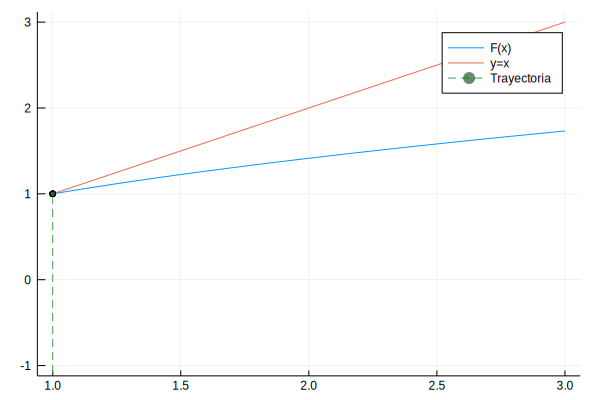

In [12]:
grafica_mapeo(F, x_y...)

## 3

- Usen el análisis gráfico para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Den explícitamente los puntos fijos.
    
- Usen el método de Newton, usando iterados iniciales  sagazmente seleccionados, para obtener los puntos fijos.

In [13]:
include("utils.jl") # Cargo cosas de notebooks pasados(newton)

newton

Probemos algunos puntos como condición inicial.

In [14]:
F(x) = x^2 - 1.1

F (generic function with 1 method)

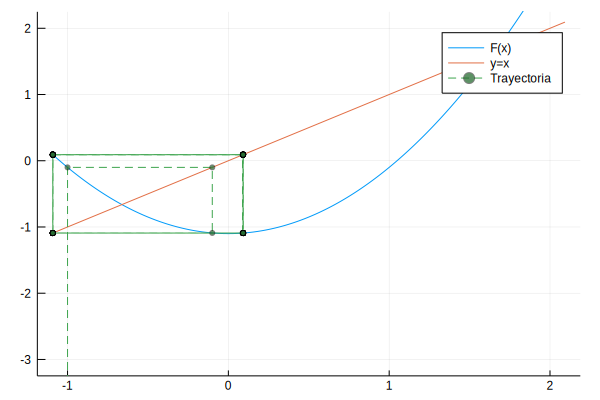

In [15]:
x0 = -1.
xnn, x_y = itera_mapeo(F, x0)
grafica_mapeo(F, x_y...)

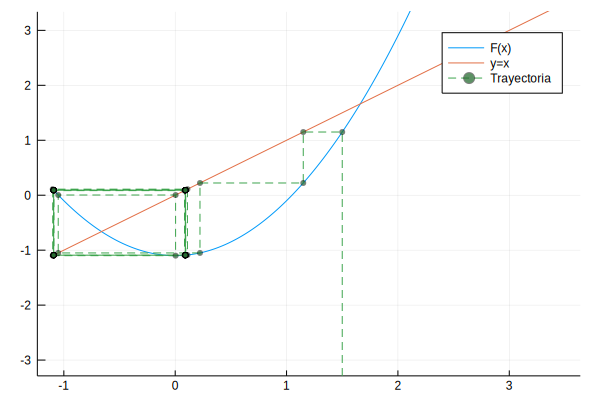

In [16]:
x0 = 1.5
xnn, x_y = itera_mapeo(F, x0)
grafica_mapeo(F, x_y...)

De las figuras anteriores observamos las órbitas periódicas, estas son el "cuadrado".

Pongámonos más rigurosos, usemos el método de Newton para dar con los puntos fijos.

In [17]:
?newton

search:



```
newton(f, f', x0, n_iter)
```

Devuelve las raíces de la función `f`.


Para esta $F$ los puntos fijos han de satisfacer
$$
F(x) = x^2 - 1.1 = x\\
\Rightarrow x^2-x-1.1 = 0
$$
Hay que emplear el método de Newton para encontrarlos, prosigamos.

In [18]:
g(x) = x^2 - x - 1.1
g′(x) = 2 * x - 1

g′ (generic function with 1 method)

In [19]:
print("Este es un punto fijo: " ,newton(g, g′, -1.3))

Este es un punto fijo: -0.6618950038622251

In [20]:
print("Este es otro punto fijo: ", newton(g, g′, 1.3))

Este es otro punto fijo: 1.661895003862225

Ya conociendo exáctamente estos puntos fijos veamos qué pasa cuando iniciamos cerca de ellos.

In [21]:
x0 = -0.6718950038622251
xnn, x_y = itera_mapeo(F, x0)

@manipulate for n=slider(1:100, value=1) # Con esto hago la gráfica de forma interactiva!
    grafica_mapeo(F, x_y..., n=n)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_02", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-25b763e7-382e-4b2d-be4c-c1140261d787", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 100),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_01", 1, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(funct

Al parecer cuando se inicia cerca de este punto fijo la órbita se aleja de él, veamos que sucede en el otro punto.

In [22]:
x0 = 1.561895003862225
xnn, x_y = itera_mapeo(F, x0)

@manipulate for n=slider(1:100, value=1) # Con esto hago la gráfica de forma interactiva!
    grafica_mapeo(F, x_y..., n=n)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_08", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-eaf7aa42-0555-446e-a372-848b5f7235a5", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 100),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_07", 1, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(funct

Notemos que el otro punto fijo también repele, ambos puntos repelen, lo interesante es que al ser estos dos puntos repelentes se crea una zona "estable", estos son los puntos de periodicidad 2. Veamos quiénes son.

In [23]:
println("El primer punto es: ", xnn[end])
print("El segundo punto es: ", xnn[end-1])

El primer punto es: -1.0916079783099617
El segundo punto es: 0.0916079783099617

In [24]:
# Hay que guardarlos para futuro uso
xp1 = xnn[end]
xp2 = xnn[end-1]

0.0916079783099617

## 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

- $F_1(x) = \frac{1}{3x}$.

- $F_2(x) = -\frac{x^5}{5}$.

- $F_3(x) = \frac{x}{2}-2$.

Proponemos tres fuciones: (1) la función `random` genera un punto al azar en cualquier intervalo $[a,b]$, (2) la función `newton` encuentra las raíces de un polinomio, y finalmente, (3) la función `itera_mapeo!` permite realizar el análisis gráfico de distintas órbitas en una misma gráfica.

In [25]:
doc"""
    random(distancia, semidistancia)
Devuelve un número aleatorio entre el intervalo [a,b]. La primera componente de la funcion es la `distancia` entre `a` y `b`, mientras que la segunda componenete hace referencia a la `semidistancia` entre `a y `b`.
"""

function random(distancia, semidistancia)
    aleatorio = (distancia * rand()) - semidistancia
    return aleatorio
end 

random

In [26]:
doc"""
    newton(f, f', x0, n_iter)
Devuelve las raíces de la función `f`.

"""
function newton(f, fprime, x0, n_iter::Int64=1000)
    
    x_nn = x_n = x0
    for i in 1:n_iter
        x_nn = x_n - (f(x_n) / fprime(x_n))
        x_n = x_nn
    end
    return float(x_nn)
end

newton

In [27]:
function itera_mapeo2!(F, x0, n_iter=100)
    xnn = [x0]
    x = [x0]; y = [-10000.]
    for i in 1:n_iter
        xn = xnn[end]
        Fn = F(xn)
        push!(xnn, Fn)
        push!(x, xn)
        push!(y, Fn)
        push!(x, Fn)
        push!(y, Fn)
    end
    x_range = [minimum(x), maximum(x)+2]
    y_range = [minimum(y[2:end])-2, maximum(y)+2]
    xx = linspace(x_range[1], x_range[2], 1000)
    p = Plots.plot!(xlim=x_range, ylim=y_range)
    Plots.plot!(xx, x -> F(x), label="F(x)")
    Plots.plot!(xx, x -> x, label="y=x")
    Plots.plot!(x, y, ls=:dash, marker=(3, .5, :dot), label="Trayectoria")
    xnn, p
end

itera_mapeo2! (generic function with 2 methods)

### (a) $F_1(x) = \frac{1}{3x}$.

Definimos la función $F_1(x) = \frac{1}{3x}$ y su derivada $F1\prime(x) = -\frac{1}{3 x^2}$.

In [28]:
F1(x) = 1/3x

F1 (generic function with 1 method)

In [29]:
F1_prime(x) = -1/3(x^2)

F1_prime (generic function with 1 method)

Claramente los puntos fijos han de estar en -inf e inf, puesto que no podemos evaluar ahí analizaremos, entonces, por casos, las distintas órbitas del mapeo.

#### (a.1) Caso 1: $x>0$

In [30]:
#xnn_F11, p_11 = itera_mapeo2(F1, 0.0001, 100)
#p_11

A continuación se muestran algunas de las distintas órbitas que pueden generarse por diferentes puntos iniciales positivos.

$x0=0.0001$
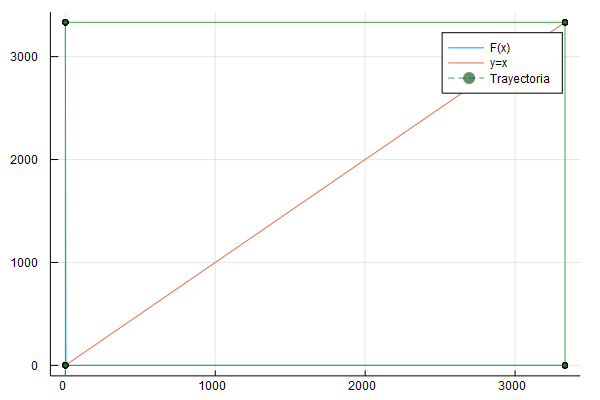

$x0=0.1$
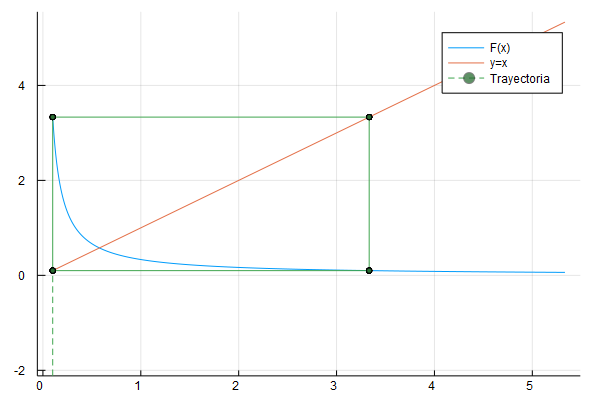

$x0=0.3$
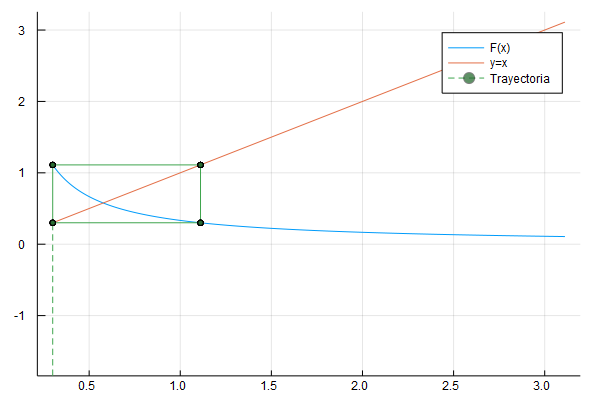

$x0=0.6$
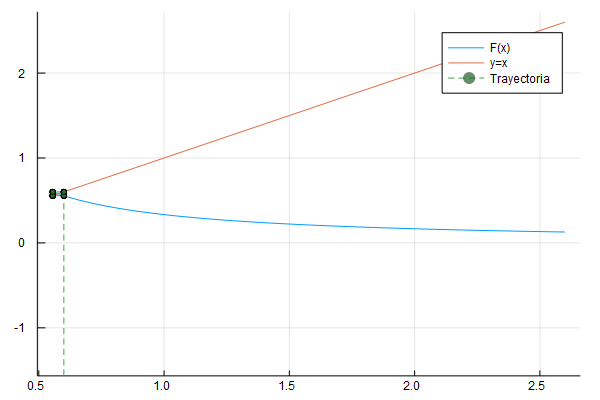

$x0=0.07$
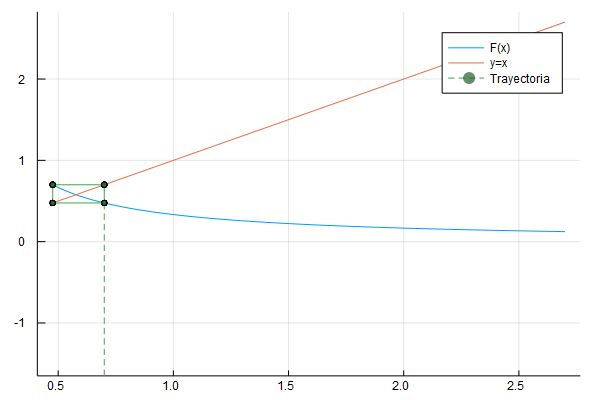

$x0=1.0$
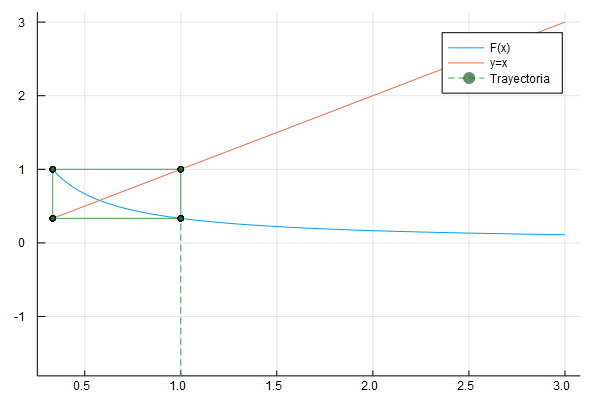

$x0=10.0$
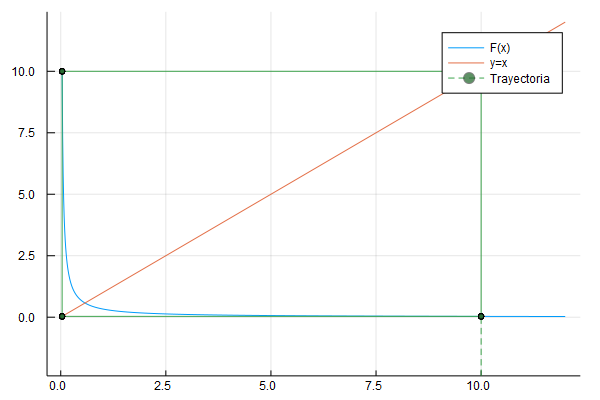

$x0=100.0$
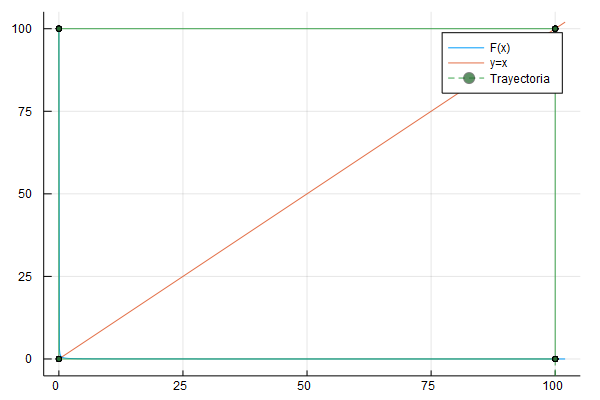


#### (a.2) Caso 2: $x=0$

Este caso "no genera" resultados, pues cuando el punto incial $x0=0$, el mapeo se indetermina y no de genera órbita alguna. Sin embargo en $x=0$ al mapear a inf y al ser este un punto fijo la órbita se queda ahí.

#### (a.3) Caso 3: $x<0$

El caso para el cual el punto inicial $x<0$,  es análogo al caso 1. Las órbitas con puntos inciales negativos pueden considerarse como "un reflejo" (sobre el eje x) de las órbitas con puntos inciales positivos.

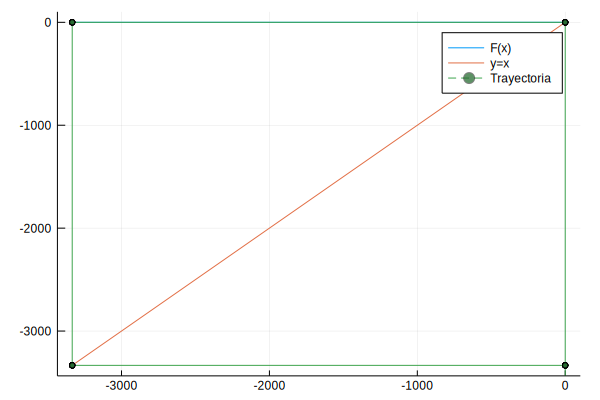

In [31]:
xnn_F13, p_13 = itera_mapeo2(F1, -0.0001, 100)
p_13

#### (a.4) Conclusiones

[1] Los puntos fijos del mapeo son -inf e inf, pero por cálculos numéricos esto dos puntos no pueden ser evaluados.

[2] Las orbitas observadas son siempre periódicas en un periodo de 4, tal y como se puede observar en los Casos 1 y 2. Al ser periódicas, si el númeroo de iteraciones sobrepasa el período de la orbita, entonces el número de iteraciones del mapeo no afecta el análisis gráfico. 

Adicionalmente, cada órbita varía de acuerdo con el valor que adquiera el punto inicial: 

   - Valores muy cercanos a 0 (tanto positivos como negativos) generan órbitas "bastante grandes" como es el caso de $x0 = 0.0001, -0.0001$
    
   - Valores en el intervalo $[0.1,1]$ generan órbitas variables cuyas trayectorias siempre presentan valores mayores a $0$ como su segunda cordenada. 
    
   - Valores superiores a 1 generan órbitas variables cuyas trayectorias siempre presentan en las componentes de sus coordenadas al $0$ o al valor del $x0$ usado como punto inicial (es decir que los puntos en su órbita tienen por coordenadas $(0, 0)$, $(0, x0)$, $(x0, 0)$, $(x0, x0)$). Las "amplitud" (o "el tamaño") de la trayectoria de la órbita depende del valor del punto inicial, pues si el punto incial "aumenta", también lo hará el "tamaño" de la órbita.
   
   - Los tres puntos anteriores que describen las diferentes órbitas del mapeo $F1(x)$ cuando el punto inicial es positivo son totalmente análogos para los caso cuando el punto inicial toma valores negativos. Las órbitas con puntos inciales negativos pueden considerarse como "un reflejo" (sobre el eje x) de las órbitas con puntos inciales positivos.

### (b) $F_2(x) = -\frac{x^5}{5}$.

Definimos la función $F_2(x) = -\frac{x^5}{5}$ y su derivada $F_2\prime(x) = -x^4$.

In [36]:
F2(x) = - x^5 / 5

F2 (generic function with 1 method)

In [37]:
F2_prime(x) = - x^4

F2_prime (generic function with 1 method)

Utilizamos el método de Newton (función `newton`) para encontrar las raíces de $F2(x)$ y utilizarlas como puntos iniciales en el mapeo de la órbita. Debido a que $F2(x)$ es de orden 5, se esperan encontrar 5 raíces que den solucion al polinomimo.

In [38]:
cond_iniciales2 = -10:0.25:10
raices_F2 = []
for x0 in cond_iniciales2
    raiz = newton(F2, F2_prime, x0, 10000)
    push!(raices_F2, raiz)
end

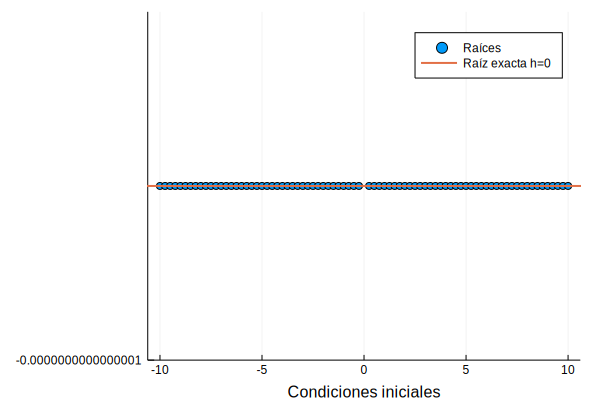

In [39]:
Plots.scatter(cond_iniciales2, raices_F2, label="Raíces", xlabel="Condiciones iniciales")
hline!([0], label="Raíz exacta h=0", lw=2)

Por lo tanto, se obtuvo que $F_2(x) = -\frac{x^5}{5}$ sólo tiene como raíz real a $x = 0$, mientras que las 4 raíces restanstes son raíces complejas. Utilizaremos solamente como punto incial $x0 = 0$ como punto inicial para el mapeo.

Asimsimo, el mapeo de $F_2(x) = -\frac{x^5}{5}$, al contener a la variable `x` elevada a la quinta potencia, adquiere valores bastante grandes (ya sea para x positiva, $x>1$, o para x negativa, $x>1$). Por este motivo, la órbita del mapeo solamente está definida en el intervalo $(-1.5, 1.5)$ pues si `x` adquiere valores superiores a 1.5 o inferiores a 1.5, el mapeo $F_2(x) = -\frac{x^5}{5}$ adquiere valores demasiado grandes, de manera que son interpretados como $Inf$ o $-Inf$.

Analizando 3 casos para el valor del $x0$ que será usado como punto incial tenemos que:

#### (b.1) Caso 1: $-1.5 < x < 0$

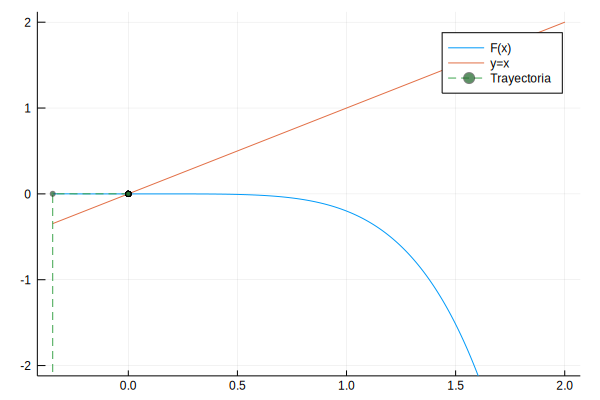

In [40]:
x_01 = - random(1.5, 0)

xnn_F21, p_21 = itera_mapeo2(F2, x_01, 100)
p_21

Se muestran a continuación mapeos adicionales para el caso $-1.5 < x < 0$

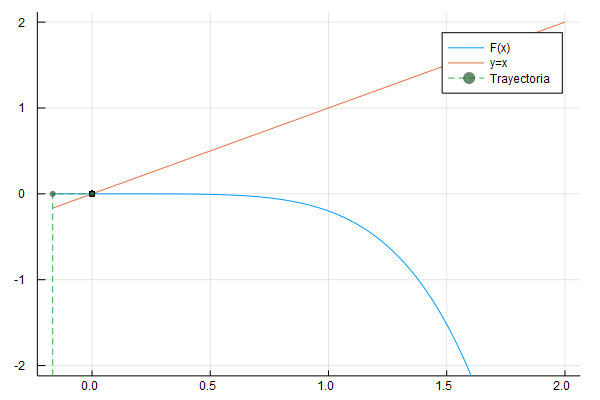 

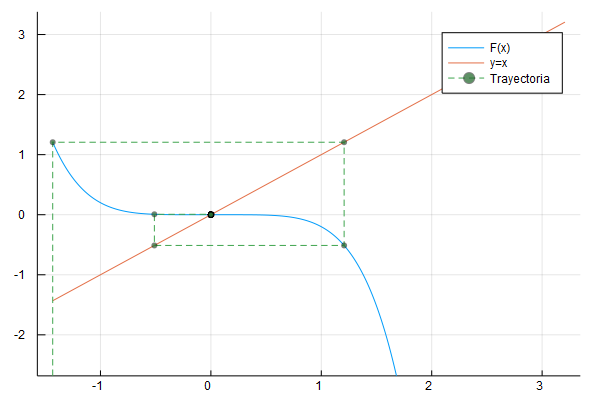

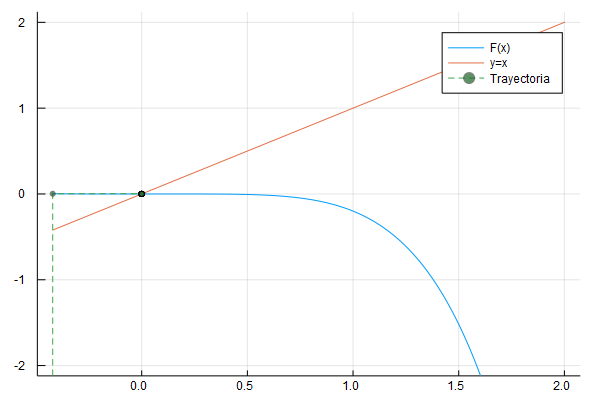

#### (b.2) Caso 2: $x = 0$

En este caso, $x0 = 0$ es un punto fijo, pues en el análisis gráfico, la órbita esta compuesta únicamente por un punto. 

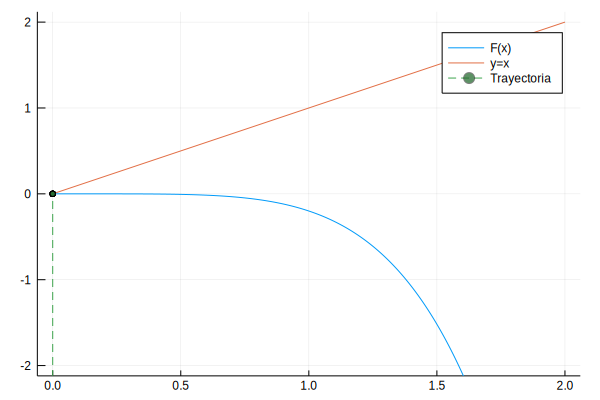

In [41]:
xnn_F22, p_22 = itera_mapeo2(F2, 0, 100)
p_22

#### (b.3) Caso 3: $0 < x < 1.5$

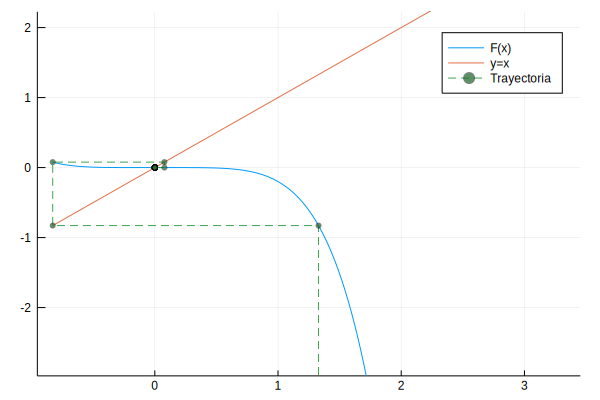

In [42]:
x_03 = random(1.5, 0)

xnn_F23, p_23 = itera_mapeo2(F2, x_03, 100)
p_23

Se muestran a continuación mapeos adicionales para el caso $0 < x < 1.5$
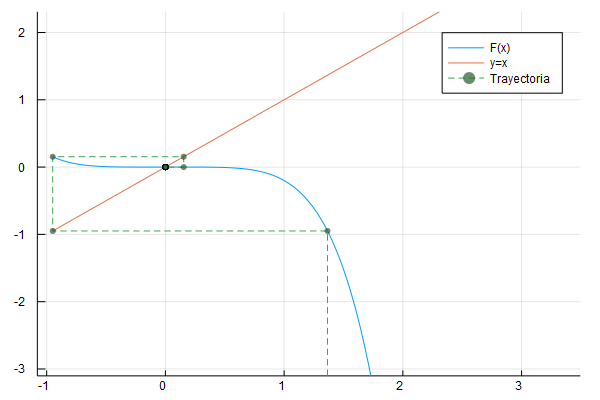

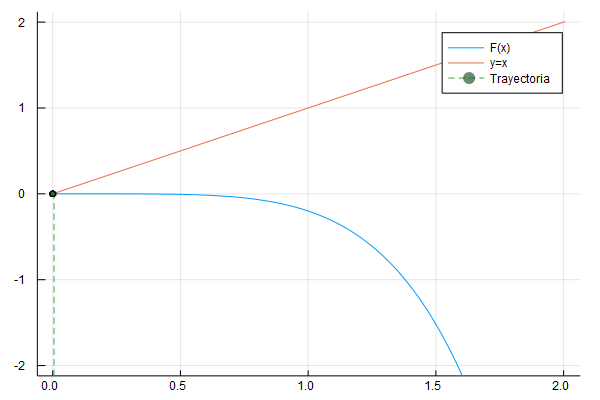

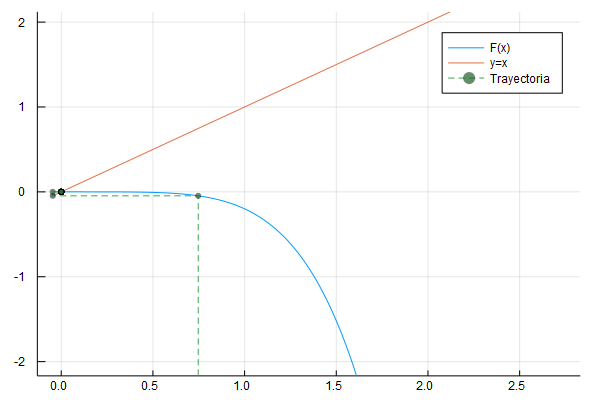

#### (b.4) Conclusiones

[1] A partir de la funcion `newton` (y de las gráficas generadas con los resultados), se obtuvo que solo una de las 5 raíces de $F_2(x) = -\frac{x^5}{5}$ es real. El punto $x0 = 0$, además de ser la raíz real de $F_2(x) = -\frac{x^5}{5}$, juega el papel de punto fijo en la órbita del mapeo. Con el análisis gráfico en los tres casos presentados anteriormente, se observa que las distintas órbitas mapeadas convergen al punto fijo $x0 = 0$, por lo que se concluye que es un atractor.

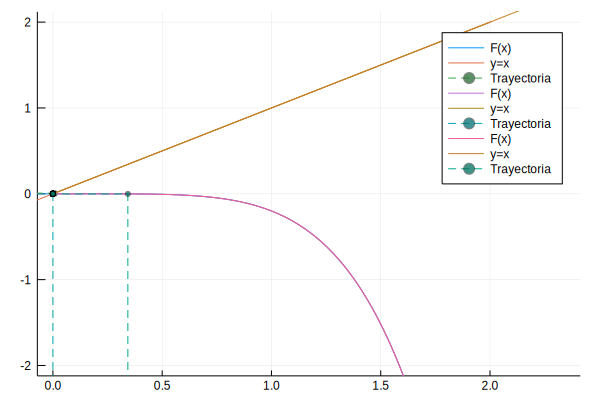

In [43]:
x_01 = - random(1.5, 0)
xnn_F21, p = itera_mapeo2(F2, x_01, 100)
xnn_F22, _ = itera_mapeo2!(F2, 0, 100)

x_03 = random(1.5, 0)
xnn_F23, _ = itera_mapeo2!(F2, x_03, 100)


p


### (c) $F_3(x) = \frac{x}{2}-2$.

Definimos la función $F_3(x) = \frac{x}{2}-2$.

In [44]:
F3(x) = x/2 - 2

F3 (generic function with 1 method)

Utilizamos el método de Newton (función `newton`) para encontrar las puntos fijos de $F3(x)$ y utilizarlos como puntos iniciales en el mapeo de la órbita.

In [45]:
cond_iniciales3 = -50:50
raices_F3 = []
for x0 in cond_iniciales3
    raiz = newton(x->F3(x) - x, x-> 1/2 - 1, x0, 10000)
    push!(raices_F3, raiz)
end

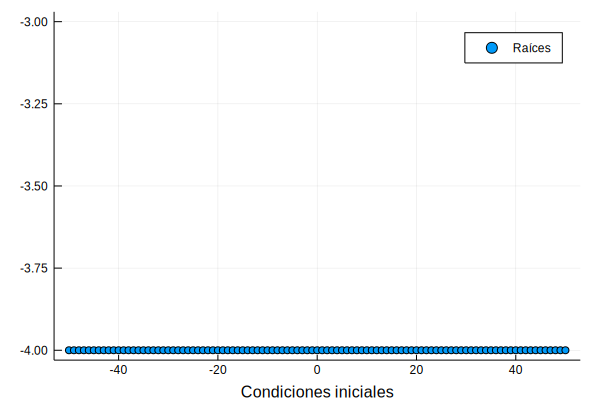

In [46]:
Plots.scatter(cond_iniciales3, raices_F3, label="Raíces", xlabel="Condiciones iniciales")

Usando `newton` obtenemos que el punto de $F_3(x) = \frac{x}{2}-2$ es $-4$. Analizamos entonces 3 casos:

#### (c.1) Caso 1: $x < -4$

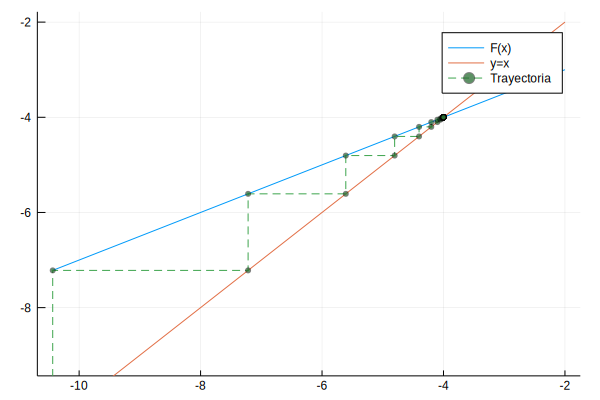

In [47]:
xnn_F31, p_31 = itera_mapeo2(F3, -random(50,0), 100)
p_31

#### (c.2) Caso 2: $x = -4$

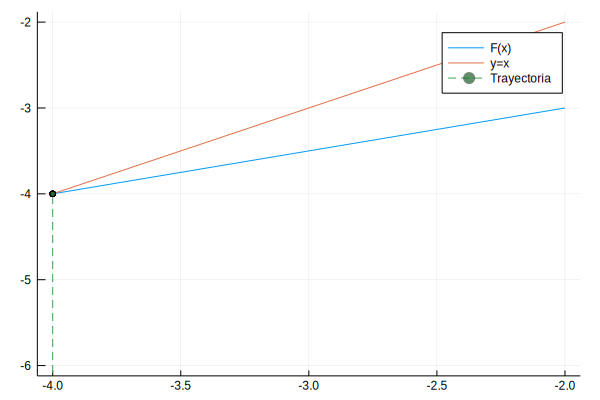

In [48]:
xnn_F32, p_32 = itera_mapeo2(F3, -4.0, 100)
p_32

#### (c.3) Caso 3: $-4<x$

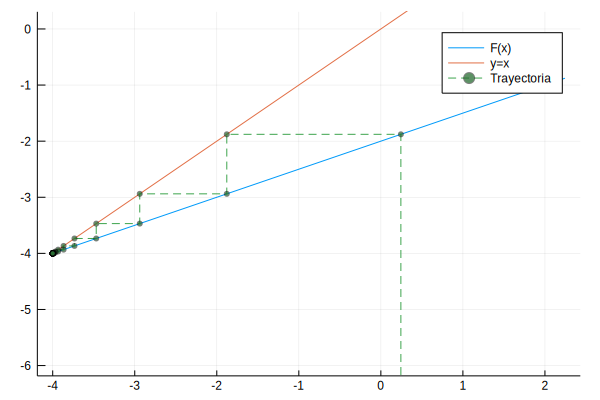

In [49]:
xnn_F33, p_33 = itera_mapeo2(F3, random(50,0), 100)
p_33

#### (c.4) Conclusiones

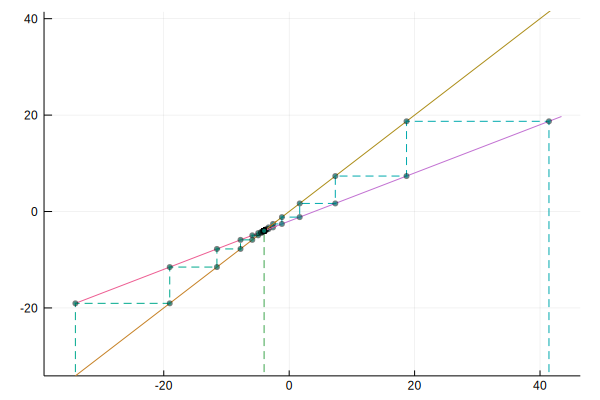

In [50]:
xnn_F32, _ = itera_mapeo2(F3, -4.0, 100)
xnn_F33, _ = itera_mapeo2!(F3, random(50,0), 100)
xnn_F31, p = itera_mapeo2!(F3, -random(50,0), 100)
lims1 = minimum([minimum(x) for x in [xnn_F31, xnn_F32, xnn_F33]])
lims2 = maximum([maximum(x) for x in [xnn_F31, xnn_F32, xnn_F33]])
plot!(xlims=(lims1-5, lims2+5), ylims=(lims1, lims2), legend=false)
p

[1] El punto $x0=-4$ es un punto fijo como puede observarse en el caso 2.

[2] Para el caso 1, cuando $x>-4$, las órbitas convergen hacia el punto fijo, disminuyendo su valor con cada iteración hasta alcanzar un valor de $-4$.

[3] Para el caso 3, cuando $x<-4$, las órbitas convergen hacia el punto fijo, aumentando su valor con cada iteración hasta alcanzar un valor de $-4$.

[4] Por lo tanto, se concluye que el mapeo $F_3(x) = \frac{x}{2}-2$ es un atractor. 

## 5

- Para el mapeo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$ (ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de $20\,000$ iterados. Obtengan el histograma de frecuencia (normalizado) de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

- \Repitan el inciso anterior para el mapeo: $G(x) = 2x \mod 1$ en el intervalo [0,1].

(NOTA: En cuanto al histograma, pueden construir su propia función que haga el histograma, o buscar en las entrañas de la documentación.)

In [51]:
"""
    random(distancia, semidistancia)
Devuelve un número aleatorio entre el intervalo [a,b]. La primera componente de la funcion es la `distancia` entre `a` y `b`, mientras que la segunda componenete hace referencia a la `semidistancia` entre `a y `b`.
"""

function random(distancia, semidistancia)
    aleatorio = (distancia * rand()) - semidistancia
    return aleatorio
end 

random

### (a) Mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$

Puesto que la función $F(x) = x^2-2$ fue definida en el ejercicio 1, se procederá a obtener un punto aleatorio en el intervalo $[-2,2]$ haciendo uso de la función `random`, para posteriormente generar una órbita de $20\,000$ iterados utilizando para ello la función `F\mu`.

In [52]:
F(x) = x^2 - 2

F (generic function with 1 method)

In [53]:
x_aleatorio_1 = random(4, 2)

iterados_aleatorios_1 = Fμ(F, x_aleatorio_1, 20000);

20001-element Array{Float64,1}:
 -1.73923 
  1.02493 
 -0.949514
 -1.09842 
 -0.793468
 -1.37041 
 -0.121981
 -1.98512 
  1.9407  
  1.76633 
  1.11993 
 -0.745752
 -1.44385 
  ⋮       
 -1.60165 
  0.565291
 -1.68045 
  0.8239  
 -1.32119 
 -0.254459
 -1.93525 
  1.74519 
  1.0457  
 -0.906502
 -1.17825 
 -0.611717

In [54]:
#h_1= histogram(iterados_aleatorios_1, nbins=length(iterados_aleatorios_1));
#savefig(h, "histograma.png")

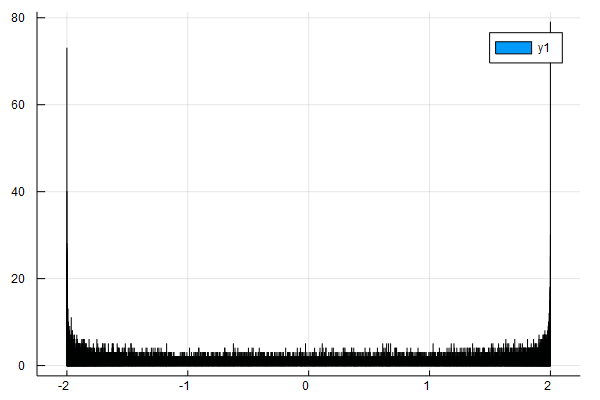

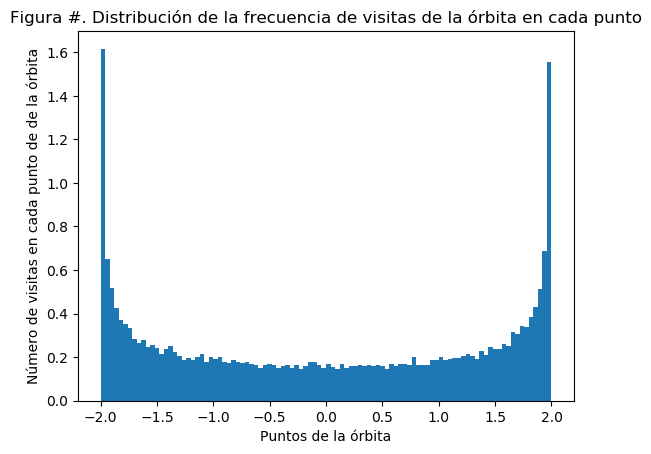

PyObject Text(0.5,1,'Figura #. Distribución de la frecuencia de visitas de la órbita en cada punto')

In [55]:
h_norm_1 = PyPlot.plt[:hist](iterados_aleatorios_1, normed=true, bins=100);
#grid("on")
xlabel("Puntos de la órbita")
ylabel("Número de visitas en cada punto de de la órbita")
title("Figura #. Distribución de la frecuencia de visitas de la órbita en cada punto")

La información y documentación requerida para gráficar histogramas fue obtenida del sitio web http://nbviewer.jupyter.org/github/gizmaa/Julia_Examples/blob/master/pyplot_histogram.ipynb (una extensión del notebook https://gist.github.com/gizmaa/7214002).

Algunas conclusiones obtenidas a partir del análisis del mapeo de $F(x) = x^2-2$ en el intervalo $[-2,2]$ son:

[1] El histograma muestra la frecuencia de visitas (u ocurrencia) de cada uno de los puntos de la órbita generada por el mapeo de $F(x) = x^2-2$. Esto significa que aquellos puntos con una mayor frecuencia de visitas (o una mayor ocurrencia), como es el caso de los puntos $x0 = 2, -2$ en el presente histograma, "fueron obtenidos una mayor cantidad de veces" por el mapeo $F(x) = x^2-2$. Por lo tanto, se concluye que los puntos de la órbita $x0 = 2, -2$ son puntos fijos del mapeo $F(x) = x^2-2$

[2] Debido a que el primer punto usado como condición inicial fue tomado al azar en el intervalo $[-2,2]$, la distribucion obtenida en el histograma representa la tendencia "que sigue" la órbita del mapeo independientemente de la condición inicial a partir de la cual se comenzó a iterar. 

[3] Del mismo modo, se observa que a partir de cierto número `n` de iterados,  la distribución del histograma (es decir, la frecuencia de visitas para cada uno de los puntos de la órbita) será en escencia la misma para cualquier número de iterados mayor o igual a `n` que se elija.

### (a) Mapeo $G(x) = 2x \mod 1$ en el intervalo [0,1]

Para analizar el mapeo de Definiendo la función $G(x) = 2x\mod1$

In [56]:
G(x) = mod(2x, 1)

G (generic function with 1 method)

In [57]:
iterados_aleatorios_2 = Fμ(G, rand(), 500);

In [58]:
#h_2= histogram(iterados_aleatorios_2, nbins=length(iterados_aleatorios_2))
#Plots.savefig(h_2, "histograma2_1.png")

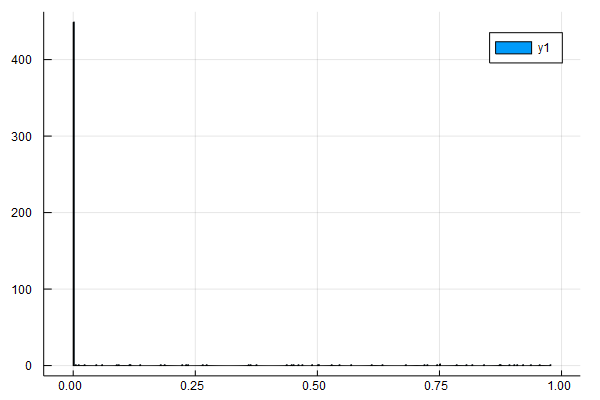

Se muestra el histograma del mapeo de $G(x) = 2x \mod1$ cuyos numero de iterados es 500. 

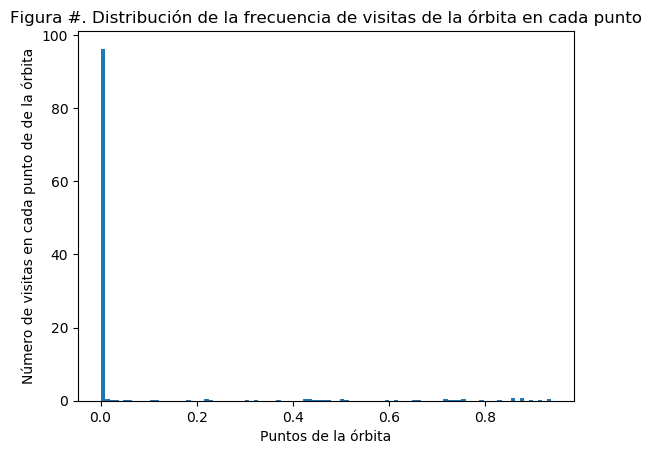

PyObject Text(0.5,1,'Figura #. Distribución de la frecuencia de visitas de la órbita en cada punto')

In [59]:
h_norm_2 = PyPlot.plt[:hist](iterados_aleatorios_2, normed=true, bins=100);
xlabel("Puntos de la órbita")
ylabel("Número de visitas en cada punto de de la órbita")
title("Figura #. Distribución de la frecuencia de visitas de la órbita en cada punto")

La información y documentación requerida para gráficar histogramas fue obtenida del sitio web http://nbviewer.jupyter.org/github/gizmaa/Julia_Examples/blob/master/pyplot_histogram.ipynb (extensión del notebook https://gist.github.com/gizmaa/7214002).

## 6

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$. ¿Qué podemos decir de la convergencia?

In [60]:
F(x) = x^2
G(x) = x^3
H(x) = -x^3

H (generic function with 1 method)

#### Mapeo $F(x) = x^2$

Encontremos los puntos fijos mediante el método de Newton.

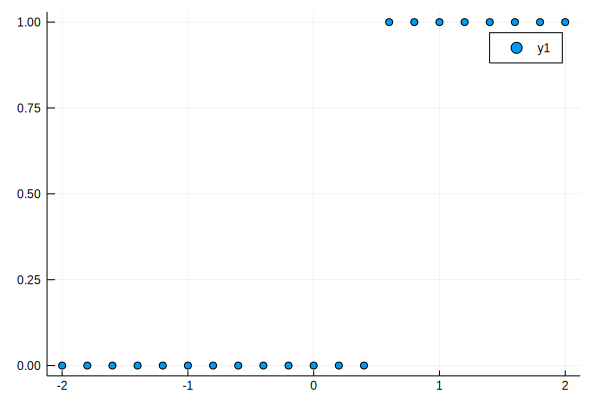

In [61]:
# Para el primer mapeo
cond_iniciales = -2:0.2:2
raices = [newton(x -> x^2-x, x -> 2*x - 1, x0) for x0 in cond_iniciales];
Plots.scatter(cond_iniciales, raices)

Lo anterior nos dice que $1$ y $0$ son puntos fijos, veamos el comportamiento alrededor de esos puntos.

In [62]:
srand(42);

In [63]:
# Ojo aquí, la siguiente celda puede fallar si alguno de estos puntos cae a la derecha del punto fijo 2
# Esto es así porque rápidamente se va a infinito
δ = 0.1 * randn()
x0_1 = 0 + δ; x0_2 = 1 + δ; 

In [64]:
fnn1, x_y1 = itera_mapeo(F, x0_1, n_iters=30)
fnn2, x_y2 = itera_mapeo(F, x0_2, n_iters=30)

@manipulate for n=slider(1:length(x_y1[1]), value=1)
    grafica_mapeo(F, x_y1..., n=n)
    grafica_mapeo!(F, x_y2..., n=n)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_14", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-0e0c4d93-4871-4b64-86f2-c4556c7aeb39", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 61),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_13", 1, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(functi

De lo anterior se concluyen dos cosas, el punto fijo $x^*=0$ es un punto atractor, mientras que el punto $x^*=1$ es un punto repulsor.

#### Mapeo $G(x) = x^3$

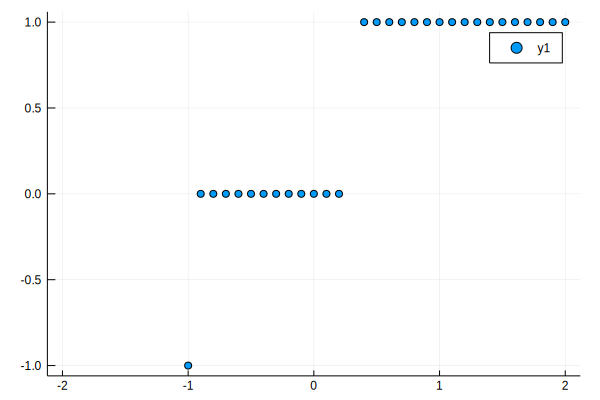

In [65]:
cond_iniciales = -2:0.1:2
raices = [newton(x -> x^3-x, x -> 3*x - 1, x0) for x0 in cond_iniciales];
Plots.scatter(cond_iniciales, raices)

Se tienen pues 3 raíces: $-1$, $0$, $1$. Veamos qué comportamiento tienen estos 3 puntos fijos.

In [66]:
# Aquí no se presenta el mismo problema que el anterior puesto que se ha cambiado de randn a rand
# Y se ha usado el hecho de que el primer punto si se acerca por la izq de él se diverge
# Para el tercero ocurre lo mismo pero por la derecha
# Estos dos puntos son repelentes, mientras que el 0 es atractor
# Veamos
δ = 0.1 * rand()
x0_1 = -1 + δ; x0_2 = 0 + δ; x0_3 = 1 - δ;

In [67]:
gnn1, x_y1 = itera_mapeo(G, x0_1, n_iters=20)
gnn2, x_y2 = itera_mapeo(G, x0_2, n_iters=20)
gnn3, x_y3 = itera_mapeo(G, x0_3, n_iters=20)

@manipulate for n=slider(1:length(x_y1[1]), value=1)
    grafica_mapeo(G, x_y2..., n=n)
    grafica_mapeo!(G, x_y3..., n=n)
    grafica_mapeo!(G, x_y1..., n=n)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_20", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-f797f01c-593a-4595-96ca-ffdcaaf48a90", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 41),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_19", 1, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(functi

En este caso el primer punto fijo es repulsor, el segundo un atractor y el último un repulsor.

#### Mapeo $H(x) = -x^3$

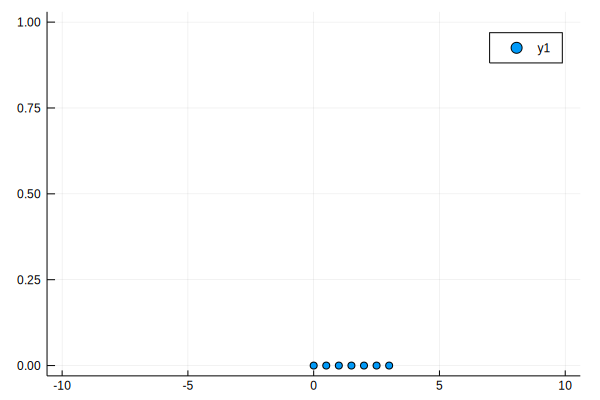

In [68]:
cond_iniciales = -10:0.5:10
raices = [newton(x -> -x^3-x, x -> -3*x - 1, x0) for x0 in cond_iniciales];
Plots.scatter(cond_iniciales, raices)

Sólo hay una raíz real, este es el único punto fijo.

In [69]:
δ = 0.1 * randn()
x0 = 0 + δ;

In [70]:
hnn, x_y = itera_mapeo(H, x0)
@manipulate for n=slider(1:length(x_y[1]), value=1)
    grafica_mapeo(H, x_y..., n=n)
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_26", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-a9b8e64c-7c90-4887-956b-ec433f3f1b97", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 201),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_25", 1, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/uzielnmtz/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/uzielnmtz/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/uzielnmtz/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":1}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(funct

Es un punto atractor.

## 7

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.) ¿Qué podemos decir de la convergencia?

## 8

En el ejercicio 3, implementaron el análisis gráfico (y el método de Newton) para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Usen el módulo de duales para mostrar la estabilidad de esos puntos.

In [71]:
using Base.Test
include("DifAuto.jl")

deriva

In [72]:
F(x) = x^2 - 1.1
F²(x) = F(F(x))

F² (generic function with 1 method)

Se tenía que los puntos periódicos eran $x_1^*=-1.0916079783099617$ y $x_2^*=0.0916079783099617$.

Lo que se busca es mostrar que

\begin{equation}
\frac{\textrm{d}F^2(x_0)}{\textrm{d}x} = F'(F(x_0)) F'(x_0) = F'(x_1) F'(x_0).
\end{equation}

In [73]:
xp1D = dual(xp1)
xp2D = dual(xp2)

0.0916079783099617+1.0ε

In [74]:
?deriva

search:



doc     deriva(f, x0) Devuelve la derivada de la función `f` evaluada en `x0` con ayuda de los números duales.


In [75]:
@test deriva(F², xp1) == deriva(F, xp1) * deriva(F, xp2)

Test Passed

Éxito!!